In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [46]:
dataForTrain = pd.read_csv('train_dataset.csv')

In [47]:
dataForTrain.head(3)

,id,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
0,7233,dedicated graphics,"['bluetooth', 'lan 10/100/1000 mbps']",1920 x 1080,4,32 gb,['no system'],ssd + hdd,"['keyboard', 'touchpad', 'illuminated keyboard...","['SD card reader', 'camera', 'speakers', 'micr...",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
1,5845,dedicated graphics,"['wi-fi', 'bluetooth', 'lan 10/100 mbps']",1366 x 768,4,8 gb,['windows 10 home'],ssd,"['keyboard', 'touchpad', 'numeric keyboard']","['SD card reader', 'camera', 'speakers', 'micr...",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
2,10303,NaN,"['bluetooth', 'nfc (near field communication)']",1920 x 1080,2,8 gb,['windows 10 home'],hdd,NaN,['SD card reader'],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0


In [48]:
dataForTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4711 non-null   int64  
 1   graphic card type       4417 non-null   object 
 2   communications          4261 non-null   object 
 3   resolution (px)         4361 non-null   object 
 4   CPU cores               4711 non-null   object 
 5   RAM size                4457 non-null   object 
 6   operating system        4335 non-null   object 
 7   drive type              4454 non-null   object 
 8   input devices           4321 non-null   object 
 9   multimedia              4310 non-null   object 
 10  RAM type                4212 non-null   object 
 11  CPU clock speed (GHz)   4181 non-null   float64
 12  CPU model               4389 non-null   object 
 13  state                   4711 non-null   object 
 14  drive memory size (GB)  4439 non-null   

In [49]:
dataForTrain.isna().sum()

id                          0
graphic card type         294
communications            450
resolution (px)           350
CPU cores                   0
RAM size                  254
operating system          376
drive type                257
input devices             390
multimedia                401
RAM type                  499
CPU clock speed (GHz)     530
CPU model                 322
state                       0
drive memory size (GB)    272
warranty                    0
screen size               197
buynow_price                0
dtype: int64

In [50]:
dataForTrain = dataForTrain.dropna()

In [51]:
dataForTrain['CPU cores'] = dataForTrain['CPU cores'].astype(int)
dataForTrain['CPU cores'] = dataForTrain['CPU cores'].astype(int)

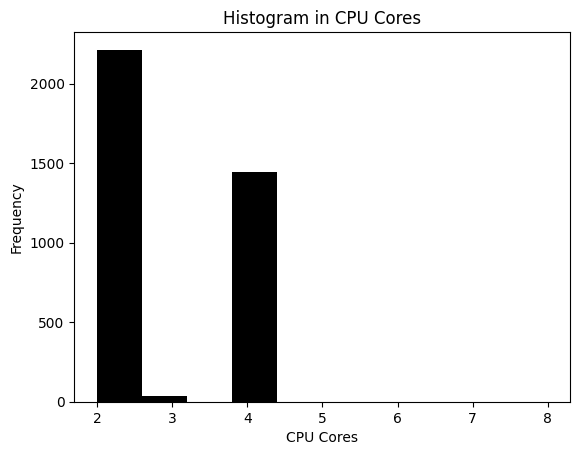

In [52]:
plt.hist(dataForTrain['CPU cores'], bins=10, color='black')
plt.xlabel('CPU Cores')
plt.ylabel('Frequency')
plt.title('Histogram in CPU Cores')
plt.savefig('CPU Cores.png')
plt.show()

In [53]:
print(dataForTrain.columns)


Index(['id', 'graphic card type', 'communications', 'resolution (px)',
       'CPU cores', 'RAM size', 'operating system', 'drive type',
       'input devices', 'multimedia', 'RAM type', 'CPU clock speed (GHz)',
       'CPU model', 'state', 'drive memory size (GB)', 'warranty',
       'screen size', 'buynow_price'],
      dtype='object')


In [54]:
pivot_table = dataForTrain.pivot_table(index='RAM size', columns='drive type', aggfunc='size', fill_value=0)

print(pivot_table)

drive type  emmc  hdd  hybrid  ssd  ssd + hdd
RAM size                                     
12 gb          0  114       3  263         85
16 gb          0  104       2  274        187
2 gb          25    2       0   17          0
20 gb          0   14       0   20          7
32 gb          0   25       0   86         90
4 gb          11  341      12  357         35
6 gb           0   40       0   35          5
8 gb           0  424      23  850        243


In [55]:
print(dataForTrain.columns)

Index(['id', 'graphic card type', 'communications', 'resolution (px)',
       'CPU cores', 'RAM size', 'operating system', 'drive type',
       'input devices', 'multimedia', 'RAM type', 'CPU clock speed (GHz)',
       'CPU model', 'state', 'drive memory size (GB)', 'warranty',
       'screen size', 'buynow_price'],
      dtype='object')


In [56]:
dataForTest = pd.read_csv("test_dataset.csv")

In [57]:
dataForTest = dataForTest.dropna()

In [58]:
dataForTest.head(3)

,id,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
0,5124,dedicated graphics,"['bluetooth', 'lan 10/100 mbps']",1920 x 1080,2,8 gb,['windows 10 home'],hdd,"['keyboard', 'touchpad']","['SD card reader', 'camera', 'microphone']",ddr4,2.0,intel core i3,new,1000.0,producer warranty,"15"" - 15.9""",2369.0
1,9595,integrated graphics,"['bluetooth', 'lan 10/100/1000 mbps', 'lan 10/...",1920 x 1080,2,4 gb,['windows 10 home'],ssd,"['keyboard', 'touchpad']","['SD card reader', 'camera', 'microphone']",ddr4,2.0,intel core i3,new,240.0,producer warranty,"15"" - 15.9""",2299.0
2,4926,dedicated graphics,"['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps']",1920 x 1080,4,16 gb,['windows 10 home'],ssd + hdd,"['keyboard', 'touchpad', 'illuminated keyboard...","['SD card reader', 'camera', 'speakers', 'micr...",ddr4,2.8,intel core i7,new,1500.0,producer warranty,"15"" - 15.9""",5999.0


In [61]:
import sklearn

X_train = dataForTrain[['CPU cores']]
y_train = dataForTrain['buynow_price']
X_test = dataForTest[['CPU cores']]
y_test = dataForTest['buynow_price']


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate MSE and R2 for SLR
mse_slr = sklearn.metrics.mean_squared_error(y_test, y_pred)
r2_slr = sklearn.metrics.r2_score(y_test, y_pred)

In [59]:
model = LinearRegression()

model.fit(dataForTrain[['CPU cores']], dataForTrain['buynow_price'])
predictions = model.predict(dataForTest[['CPU cores']])
# Calculate the MSE
mse = np.mean((predictions - dataForTest['buynow_price']) ** 2)
# Print the MSE
print("Mean Square Error:", mse)

MSE: 2128566.6313508726


In [62]:
#"R2 Score"
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(dataForTrain[['CPU cores']], dataForTrain['buynow_price'], test_size=0.25)# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.2652723283182624


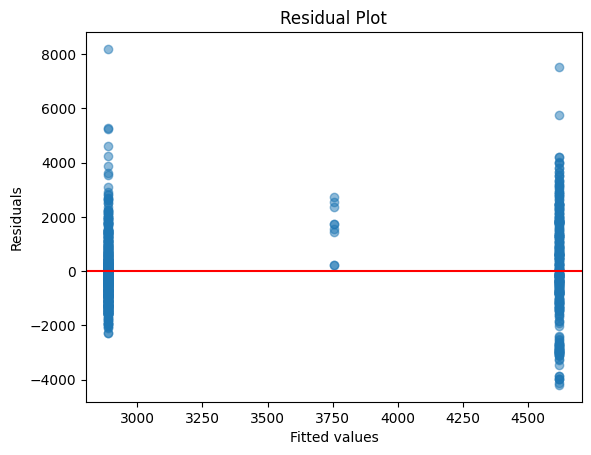

In [63]:
#"Residual Plot"
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [64]:
# independent and dependent variables
X = dataForTrain[['CPU cores', 'drive memory size (GB)']]
y = dataForTrain['buynow_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LinearRegression()

# To fit the model on the training data
model.fit(X_train, y_train)

# For predictions on the test data
y_pred = model.predict(X_test)

# Calculating the MSE and R^2 values
mse = np.mean((y_pred - y_test) ** 2)
r2 = model.score(X_test, y_test)

print('MSE:', mse)
print('R^2:', r2)


MSE: 2165369.8150288626
R^2: 0.23942038546465017


In [68]:
from sklearn.metrics import mean_squared_error, r2_score

independent_variables = ['buynow_price', 'CPU cores']
# Create a list to store the MSE and R2 values
mse_values = []
r2_values = []

# Iterate over each independent variable
for variable in independent_variables:

  # Create a linear regression model
  model = LinearRegression()

  # Fit the model to the data
  model.fit(dataForTrain[[variable]], dataForTrain['buynow_price'])

  # Make predictions
  predictions = model.predict(dataForTrain[[variable]])

  # Calculate the MSE and R2 values
  mse = mean_squared_error(dataForTrain['buynow_price'], predictions)
  r2 = r2_score(dataForTrain['buynow_price'], predictions)

  # Add the MSE and R2 values to the lists
  mse_values.append(mse)
  r2_values.append(r2)

# Create a table to store the results
results_table = pd.DataFrame({
  'Independent Variable': independent_variables,
  'MSE': mse_values,
  'R2': r2_values
})

# Print the table
print(results_table)

  Independent Variable           MSE        R2
0         buynow_price  1.793608e-25  1.000000
1            CPU cores  2.049058e+06  0.267313


In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataForTrain[['CPU cores']], dataForTrain['buynow_price'], test_size=0.25)

# Create the linear regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model
r2_score_linear = r2_score(y_test, y_pred)
print('R2 score for linear model:', r2_score_linear)

# Create the polynomial regression model
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

polynomial_model = LinearRegression()

# Fit the model to the training data
polynomial_model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred_poly = polynomial_model.predict(X_test_poly)

# Evaluate the model
r2_score_poly = r2_score(y_test, y_pred_poly)
print('R2 score for polynomial model:', r2_score_poly)

# Compare the models
if r2_score_poly > r2_score_linear:
  print('The polynomial model is better.')
else:
  print('The linear model is better.')

R2 score for linear model: 0.2525373719134548
R2 score for polynomial model: 0.2542034944703836
The polynomial model is better.


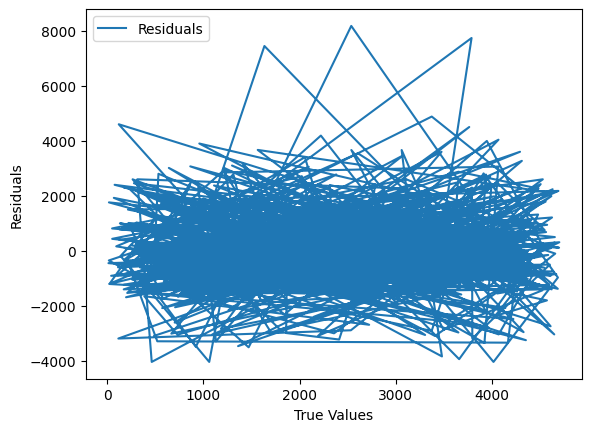

In [71]:
plt.plot(y_test - y_pred, label='Residuals')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [72]:
print("R2 score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 score: 0.2525373719134548
MSE: 2050215.813179174
